Firstly we will download the UCI HAR dataset

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

--2022-05-02 19:01:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  16.9MB/s    in 3.4s    

2022-05-02 19:01:32 (16.9 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [ ]:
#unzip it
!unzip "UCI HAR Dataset.zip"

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [ ]:
#moving it into our current working directory
!mv "UCI HAR Dataset" HARDataset/

In [ ]:
from numpy import std
from numpy import dstack
from pandas import read_csv

Here we will try to load a group of files, such as all of the body acceleration data files as a single group.

In [ ]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='HARDataset/train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [ ]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load all train
trainX, trainy = load_dataset('train', 'HARDataset/')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', 'HARDataset/')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [ ]:
testr = testy
trainr = trainy

In [ ]:
testr = testr-1

In [ ]:
from keras.utils import np_utils

In [ ]:
# zero-offset class values
testy = testy - 1
trainy = trainy - 1

In [ ]:
#one hot encoding
testy = np_utils.to_categorical(testy)
testy.shape

(2947, 6)

In [ ]:
#one hot encoding
trainy = np_utils.to_categorical(trainy)
trainy.shape

(7352, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np

# RNN MODEL


In [ ]:
from keras.layers import SimpleRNN

In [ ]:
#model creation
modelrnn = Sequential()
modelrnn.add(SimpleRNN(units = 128,input_shape=(128,9)))
modelrnn.add(Dense(units = 64, activation='relu'))
modelrnn.add(Dense(units = 6 , activation='sigmoid'))

In [ ]:
modelrnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               17664     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 26,310
Trainable params: 26,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model
modelrnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting model
history=modelrnn.fit(trainX,trainy,epochs=50,validation_data=(testX,testy))

Epoch 1/50
230/230 [==============================] - 20s 79ms/step - loss: 1.0476 - accuracy: 0.5664 - val_loss: 1.2190 - val_accuracy: 0.5399
Epoch 2/50
230/230 [==============================] - 11s 47ms/step - loss: 0.6504 - accuracy: 0.7252 - val_loss: 0.6328 - val_accuracy: 0.7526
Epoch 3/50
230/230 [==============================] - 9s 39ms/step - loss: 0.4561 - accuracy: 0.8186 - val_loss: 0.4855 - val_accuracy: 0.8229
Epoch 4/50
230/230 [==============================] - 9s 38ms/step - loss: 0.6107 - accuracy: 0.7621 - val_loss: 0.9818 - val_accuracy: 0.6176
Epoch 5/50
230/230 [==============================] - 9s 38ms/step - loss: 0.5743 - accuracy: 0.7705 - val_loss: 0.6716 - val_accuracy: 0.7089
Epoch 6/50
230/230 [==============================] - 9s 38ms/step - loss: 0.6076 - accuracy: 0.7603 - val_loss: 0.7876 - val_accuracy: 0.6702
Epoch 7/50
230/230 [==============================] - 9s 38ms/step - loss: 0.5352 - accuracy: 0.7839 - val_loss: 0.5839 - val_accuracy: 0.82

In [ ]:
modelrnn.evaluate(testX, testy)

93/93 [==============================] - 1s 12ms/step - loss: 0.6378 - accuracy: 0.8107


[0.6378424167633057, 0.810654878616333]

In [ ]:
r_pred = modelrnn.predict(testX)
# print(r_pred)
# classes_x = (modelrnn.predict(testX) > 0.5)*1 
# print(classes_x)

# Plotting Curves for Accuracy and Loss

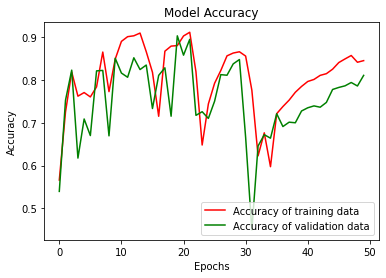

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'],'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'],'g', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

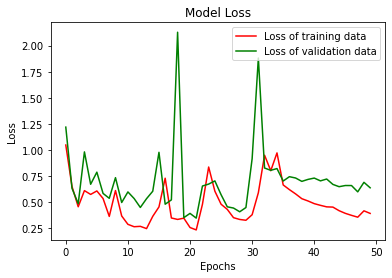

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'],'r', label='Loss of training data')
plt.plot(history.history['val_loss'],'g', label='Loss of validation data')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = modelrnn.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(testr, y_pred_classes, target_names=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]))
#here we needed testr not testy


Classification Report

                    precision    recall  f1-score   support

           WALKING       0.76      0.63      0.69       496
  WALKING_UPSTAIRS       0.71      0.72      0.71       471
WALKING_DOWNSTAIRS       0.82      0.94      0.88       420
           SITTING       0.86      0.72      0.78       491
          STANDING       0.74      0.90      0.81       532
            LAYING       1.00      0.95      0.97       537

          accuracy                           0.81      2947
         macro avg       0.81      0.81      0.81      2947
      weighted avg       0.82      0.81      0.81      2947



## We can see RNN model gives an accuracy of 86%

# LSTM model

In [ ]:
from keras.layers import LSTM

In [ ]:
#building a LSTM
#model creation
modellstm = Sequential()
modellstm.add(LSTM(units = 128,input_shape=(trainX.shape[1:]),return_sequences=True))
modellstm.add(LSTM(units = 64))
modellstm.add(Dense(units = 64, activation='relu'))
modellstm.add(Dense(units = 6 , activation='sigmoid'))

In [ ]:
modellstm.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modellstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128, 128)          70656     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 124,614
Trainable params: 124,614
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyy=modellstm.fit(trainX,trainy,epochs=50,validation_data=(testX,testy))

Epoch 1/50
230/230 [==============================] - 52s 213ms/step - loss: 0.8998 - accuracy: 0.6368 - val_loss: 0.6531 - val_accuracy: 0.7380
Epoch 2/50
230/230 [==============================] - 48s 209ms/step - loss: 0.4404 - accuracy: 0.8369 - val_loss: 0.4490 - val_accuracy: 0.8439
Epoch 3/50
230/230 [==============================] - 48s 208ms/step - loss: 0.2171 - accuracy: 0.9215 - val_loss: 0.5471 - val_accuracy: 0.8551
Epoch 4/50
230/230 [==============================] - 48s 210ms/step - loss: 0.2303 - accuracy: 0.9168 - val_loss: 0.3628 - val_accuracy: 0.8945
Epoch 5/50
230/230 [==============================] - 48s 209ms/step - loss: 0.1632 - accuracy: 0.9346 - val_loss: 0.4159 - val_accuracy: 0.8605
Epoch 6/50
230/230 [==============================] - 48s 210ms/step - loss: 0.1571 - accuracy: 0.9344 - val_loss: 0.3730 - val_accuracy: 0.8836
Epoch 7/50
230/230 [==============================] - 48s 210ms/step - loss: 0.2234 - accuracy: 0.9176 - val_loss: 0.3526 - val_ac

In [ ]:
modellstm.evaluate(testX, testy)

93/93 [==============================] - 5s 56ms/step - loss: 0.3599 - accuracy: 0.9016


[0.35991668701171875, 0.9015948176383972]

In [ ]:
r_pred = modellstm.predict(testX)

# Plotting Curves for Accuracy and Loss

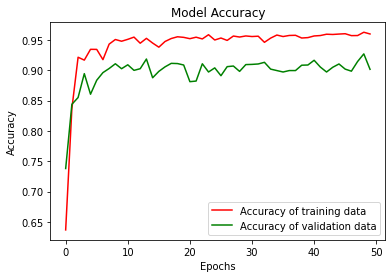

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(historyy.history['accuracy'],'r', label='Accuracy of training data')
plt.plot(historyy.history['val_accuracy'],'g', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

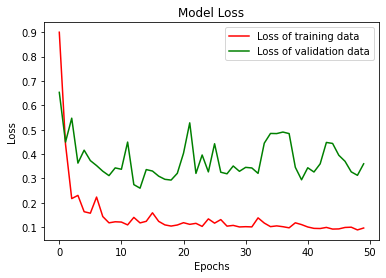

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(historyy.history['loss'],'r', label='Loss of training data')
plt.plot(historyy.history['val_loss'],'g', label='Loss of validation data')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = modellstm.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(testr, y_pred_classes, target_names=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]))
#here we needed testr not testy


Classification Report

                    precision    recall  f1-score   support

           WALKING       0.92      0.95      0.93       496
  WALKING_UPSTAIRS       0.92      0.91      0.92       471
WALKING_DOWNSTAIRS       0.95      0.92      0.93       420
           SITTING       0.87      0.73      0.79       491
          STANDING       0.79      0.90      0.84       532
            LAYING       0.99      1.00      0.99       537

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



# We can see LSTM model gives an accuracy of 90%
Therefore we can say LSTM works well on time-series data.

# **GRU Model**

In [ ]:
from keras.layers import GRU

In [ ]:
#building a GRU
#model creation
modelgru = Sequential()
modelgru.add(GRU(units = 128,input_shape=(trainX.shape[1:]),return_sequences=True))
modelgru.add(GRU(units = 64))
modelgru.add(Dense(units = 64, activation='relu'))
modelgru.add(Dense(units = 6 , activation='sigmoid'))

In [ ]:
modelgru.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelgru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128, 128)          53376     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 95,174
Trainable params: 95,174
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=modelgru.fit(trainX,trainy,epochs=50,validation_data=(testX,testy))

Epoch 1/50
230/230 [==============================] - 46s 184ms/step - loss: 0.9150 - accuracy: 0.6268 - val_loss: 0.5901 - val_accuracy: 0.7794
Epoch 2/50
230/230 [==============================] - 41s 180ms/step - loss: 0.2198 - accuracy: 0.9172 - val_loss: 0.3726 - val_accuracy: 0.8707
Epoch 3/50
230/230 [==============================] - 41s 180ms/step - loss: 0.1463 - accuracy: 0.9441 - val_loss: 0.3535 - val_accuracy: 0.8880
Epoch 4/50
230/230 [==============================] - 41s 180ms/step - loss: 0.1532 - accuracy: 0.9382 - val_loss: 0.3147 - val_accuracy: 0.9060
Epoch 5/50
230/230 [==============================] - 41s 180ms/step - loss: 0.1257 - accuracy: 0.9505 - val_loss: 0.3305 - val_accuracy: 0.8941
Epoch 6/50
230/230 [==============================] - 42s 181ms/step - loss: 0.1241 - accuracy: 0.9490 - val_loss: 0.2509 - val_accuracy: 0.9013
Epoch 7/50
230/230 [==============================] - 42s 181ms/step - loss: 0.1161 - accuracy: 0.9523 - val_loss: 0.2797 - val_ac

In [ ]:
modelgru.evaluate(testX, testy)

In [ ]:
r_pred = modelgru.predict(testX)

# Plotting Curves for Accuracy and Loss

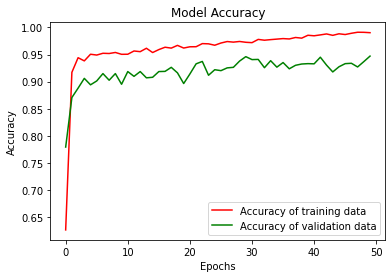

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'],'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'],'g', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

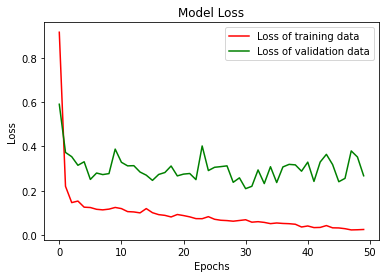

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'],'r', label='Loss of training data')
plt.plot(history.history['val_loss'],'g', label='Loss of validation data')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = modelgru.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(testr, y_pred_classes, target_names=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]))
#here we needed testr not testy


Classification Report

                    precision    recall  f1-score   support

           WALKING       0.97      0.92      0.95       496
  WALKING_UPSTAIRS       0.97      0.94      0.95       471
WALKING_DOWNSTAIRS       0.91      1.00      0.95       420
           SITTING       0.96      0.86      0.91       491
          STANDING       0.89      0.97      0.93       532
            LAYING       0.99      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



# GRU model gives an accuracy of 89%

---

